In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/archive (1).zip'
destination_folder = '/content/bear_dataset'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Extracted files to: /content/bear_dataset


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
transform={
    'train':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    'test':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    'val':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
}

In [6]:
train_dir='/content/bear_dataset/train'
test_dir='/content/bear_dataset/test'
val_dir='/content/bear_dataset/valid'

In [7]:
train_dataset=datasets.ImageFolder(root=train_dir,transform=transform['train'])
test_dataset=datasets.ImageFolder(root=test_dir,transform=transform['test'])
val_dataset=datasets.ImageFolder(root=val_dir,transform=transform['val'])

In [8]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=32,shuffle=True)


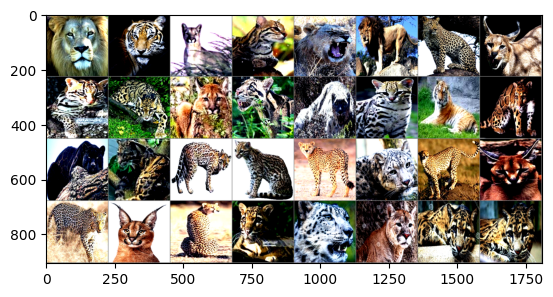

LIONS TIGER PUMA  OCELOT


In [12]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()



dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5}' for j in range(4)))

In [9]:
from torchvision import models
model=models.resnet18(pretrained=True)
num_features=model.fc.in_features
model.fc=nn.Linear(num_features,len(train_dataset.classes))
model=model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


In [10]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [13]:
def train_model(model,criterion,optimizer,num_epochs=10):
  for epoch in range(num_epochs):
    print(f"{epoch+1}/{num_epochs}")
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
      images=images.to(device)
      labels=labels.to(device)
      output=model(images)
      loss=criterion(output,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
    print(f"Train Loss:{running_loss/len(train_loader)}")

    model.eval()
    val_loss=0.0
    correct=0
    total=0
    with torch.no_grad():
      for images,labels in val_loader:
        images=images.to(device)
        labels=labels.to(device)
        output=model(images)
        loss=criterion(output,labels)
        val_loss+=loss.item()
        _,predicted=torch.max(output.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        print(f"Validation Loss:{val_loss/len(val_loader)}")
    print(f"Accuracy:{100*correct/total}%")
train_model(model, criterion, optimizer, num_epochs=10)



1/10
Train Loss:0.474562369287014
Validation Loss:1.037198543548584
Validation Loss:1.6852331757545471
Accuracy:54.0%
2/10
Train Loss:0.3673482586604518
Validation Loss:0.7650788426399231
Validation Loss:1.572809100151062
Accuracy:64.0%
3/10
Train Loss:0.31843538320547826
Validation Loss:0.19282451272010803
Validation Loss:0.4372166395187378
Accuracy:82.0%
4/10
Train Loss:0.19323769413136146
Validation Loss:0.1652033030986786
Validation Loss:0.30222630500793457
Accuracy:90.0%
5/10
Train Loss:0.1537183842344864
Validation Loss:0.29773905873298645
Validation Loss:0.4961994141340256
Accuracy:82.0%
6/10
Train Loss:0.27559867627113255
Validation Loss:0.25966209173202515
Validation Loss:0.358625665307045
Accuracy:86.0%
7/10
Train Loss:0.15143249742686749
Validation Loss:0.06999962031841278
Validation Loss:0.21138699352741241
Accuracy:94.0%
8/10
Train Loss:0.31720205703498544
Validation Loss:0.08040674775838852
Validation Loss:0.11548227816820145
Accuracy:98.0%
9/10
Train Loss:0.2269042984305

In [15]:
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")


test_model(model)

Test Accuracy: 92.0%
